In [18]:
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   3243      0 --:--:-- --:--:-- --:--:--  3243
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.21)
Already up to date.


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from google.colab import drive

In [21]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path_img = Path('/content/drive/My Drive/Data_2018/Images')

In [0]:
bs = 64

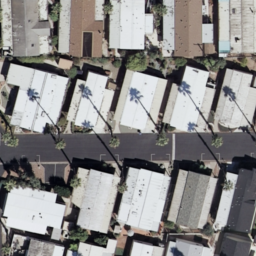

In [24]:
img = open_image('/content/drive/My Drive/Data_2018/Images/mobilehomepark/mobilehomepark20.tif')
img

In [0]:
data = ImageDataBunch.from_folder(path_img, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=256, bs=bs).normalize(imagenet_stats)

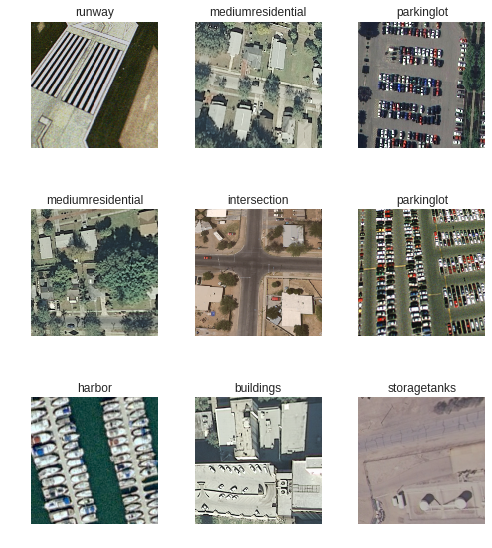

In [27]:
data.show_batch(rows = 3, figsize = (7,8))

In [28]:
data.classes, data.c

(['agricultural',
  'airplane',
  'baseballdiamond',
  'beach',
  'buildings',
  'chaparral',
  'denseresidential',
  'forest',
  'freeway',
  'golfcourse',
  'harbor',
  'intersection',
  'mediumresidential',
  'mobilehomepark',
  'overpass',
  'parkinglot',
  'river',
  'runway',
  'sparseresidential',
  'storagetanks',
  'tenniscourt'],
 21)

Fitting resnet34

In [29]:
learn = create_cnn(data, arch = models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 36087516.91it/s]


In [30]:
learn.fit_one_cycle(10)

Total time: 13:04
epoch  train_loss  valid_loss  error_rate
1      2.693198    1.258354    0.327628    (08:42)
2      1.577110    0.418244    0.117359    (00:28)
3      0.971135    0.255665    0.083130    (00:29)
4      0.628818    0.179889    0.068460    (00:29)
5      0.418496    0.172993    0.066015    (00:28)
6      0.289812    0.171759    0.058680    (00:28)
7      0.209259    0.155070    0.058680    (00:28)
8      0.152493    0.144160    0.056235    (00:28)
9      0.123119    0.135971    0.046455    (00:29)
10     0.098882    0.133620    0.051345    (00:30)



In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

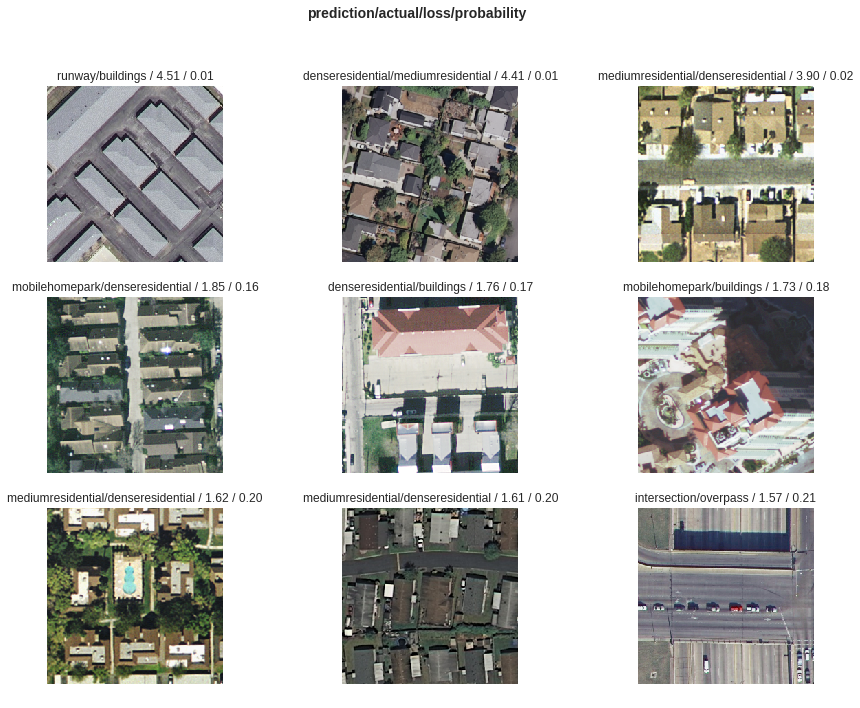

In [33]:
interp.plot_top_losses(9, figsize = (15,11))

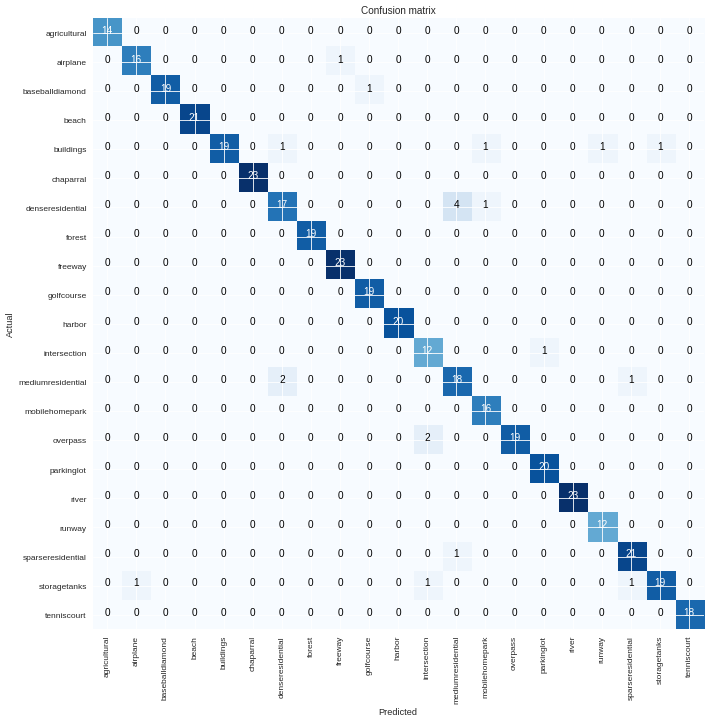

In [34]:

interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [35]:
interp.most_confused(min_val = 2)

[('denseresidential', 'mediumresidential', 4)]

In [0]:
learn.unfreeze()

In [37]:
learn.fit_one_cycle(1)

Total time: 00:32
epoch  train_loss  valid_loss  error_rate
1      0.691665    1.387833    0.298288    (00:32)



In [38]:
learn.load('stage-1')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7fc3980534a8>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [39]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


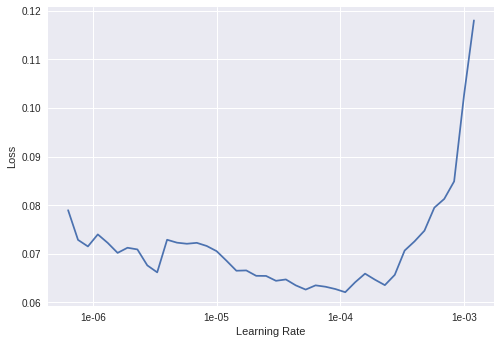

In [42]:
learn.recorder.plot()

In [43]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 01:02
epoch  train_loss  valid_loss  error_rate
1      0.068945    0.129057    0.041565    (00:31)
2      0.061958    0.122119    0.046455    (00:30)

